In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## Läser datan

In [5]:
test_sample= pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift4/test_sample.csv")
train_sample= pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift4/train_sample.csv")

test_sample_2= pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift4/test_sample_2.csv")
train_sample_2= pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift4/train_sample_2.csv")

## Analys av de 2 dataset

### Första datasetet:
test_sample har 1000 rader och 785 kolumner, medan train_sample har 5000 rader och 785 kolumner. <br>
Inga dubletter och saknade värden

In [50]:
test_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test_sample.isna().sum()


label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [8]:
listWithFalseTrue = pd.DataFrame.duplicated(test_sample)
anyTrue = listWithFalseTrue.any()
print(anyTrue)

False


In [49]:
train_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_sample.isna().all()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 785, dtype: bool

In [11]:
listWithFalseTrue = pd.DataFrame.duplicated(train_sample)
anyTrue = listWithFalseTrue.any()
print(anyTrue)

False


### Andra datasetet:

test_sample_2 har 1000 rader och 785 kolumner, medan train_sample_2 har 5000 rader och 782 kolumner. <br>
Inga dubletter och saknade värden

In [48]:
test_sample_2.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_sample_2.isna().any()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 785, dtype: bool

In [14]:
listWithFalseTrue = pd.DataFrame.duplicated(test_sample_2)
anyTrue = listWithFalseTrue.any()
print(anyTrue)

False


In [47]:
train_sample_2.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_sample_2.isna().any()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
            ...  
pixel776    False
pixel777    False
pixel778    False
pixel779    False
pixel780    False
Length: 782, dtype: bool

In [17]:
listWithFalseTrue = pd.DataFrame.duplicated(train_sample_2)
anyTrue = listWithFalseTrue.any()
print(anyTrue)

False


## Val av dataset med bäst kvalite
#### Båda dataset hade felfri innehåll, men dataset nummer 2 har olika antal kolumner när det gäller train och test data. Därför väljer jag att jobba vidare med dataset nummer 1, då den har samma  antal kolumner.

### Hur många klasser finns det?

In [18]:
antal_klasser = train_sample["label"].value_counts()
antal_klasser = antal_klasser.keys()
print("Det finns", len(antal_klasser), "klasser")

Det finns 10 klasser


### Bild klass visualizering

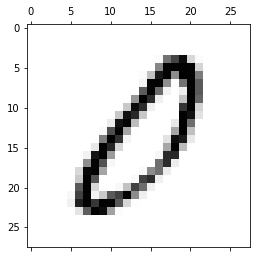

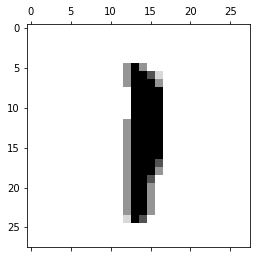

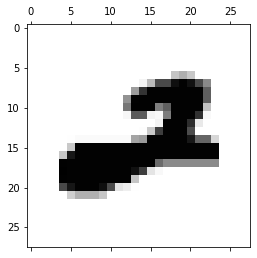

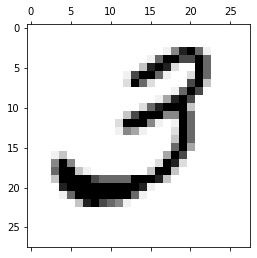

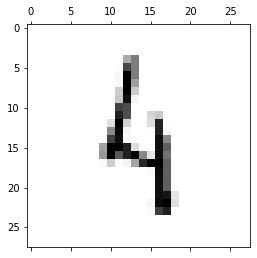

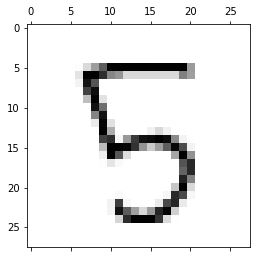

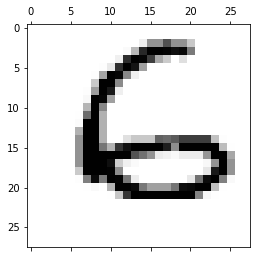

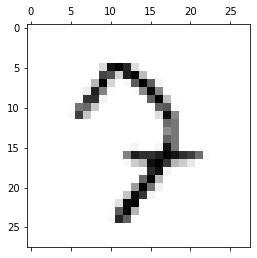

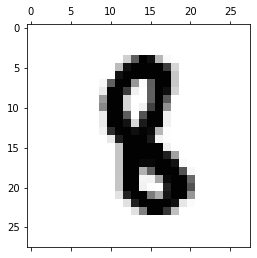

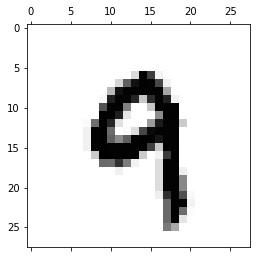

In [19]:
for nummer in antal_klasser:

    klass_bild = train_sample[train_sample['label']== nummer].sample()

    klass_bild = klass_bild.drop(columns=["label"])

    bild_visulisering = klass_bild.values.reshape(1,28,28)

    plt.matshow(bild_visulisering[0], cmap=plt.cm.Greys)

## Tränar KNN

In [20]:
x_train = train_sample.drop(columns="label")
y_train = train_sample.label

x_test = test_sample.drop(columns="label")
y_test = test_sample.label

In [68]:
print(x_train.keys())

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [66]:
print(x_train.values)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
# Räknar ut värden på "K", det vill säga n_neighbors
# Om "K" är ett jämt tal så subtraherar/ adderar man manuellt med 1 för att få ett udda tal
import math
print("K =", math.sqrt(len(y_test)))

K = 31.622776601683793


In [22]:
knn = KNeighborsClassifier(n_neighbors=31, p=2, metric="euclidean")
knn.fit(x_train, y_train)

print("Antal grannar:" , 31)
print("Test score: ", knn.score(x_test, y_test))

Antal grannar: 31
Test score:  0.916


### Testar med olika k-värden

In [23]:
listaMedAntalGrannar = [1,2,3,5,41,59, 6]
for k in listaMedAntalGrannar:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric="euclidean")
    knn.fit(x_train, y_train)

    print(f"Antal grannar: {k}")
    print("Test score: ", knn.score(x_test, y_test), "\n")

Antal grannar: 1
Test score:  0.934 

Antal grannar: 2
Test score:  0.924 

Antal grannar: 3
Test score:  0.945 

Antal grannar: 5
Test score:  0.945 

Antal grannar: 41
Test score:  0.909 

Antal grannar: 59
Test score:  0.893 

Antal grannar: 6
Test score:  0.935 



### Confusion Matrix

In [24]:
y_pred = knn.predict(x_test)

conf_matrx = confusion_matrix(y_test, y_pred)
print(conf_matrx)

[[ 97   0   0   0   0   0   3   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   4  94   0   0   0   0   1   0   1]
 [  1   1   1  91   0   3   0   0   2   1]
 [  0   2   0   0  93   0   0   0   0   5]
 [  1   2   0   1   0  93   3   0   0   0]
 [  0   0   0   0   0   3  97   0   0   0]
 [  0   5   0   0   0   0   0  91   0   4]
 [  0   3   1   3   0   6   0   1  85   1]
 [  0   0   0   0   3   0   0   3   0  94]]


### Skriv en egen funktion så att de k närmsta grannarna ritas ut för en prediktion

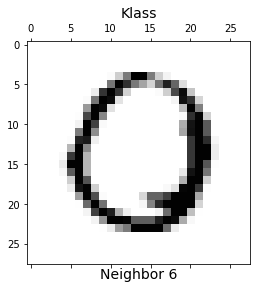

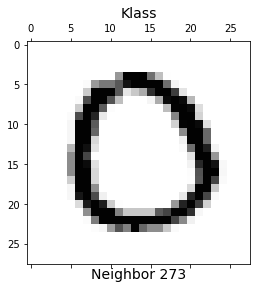

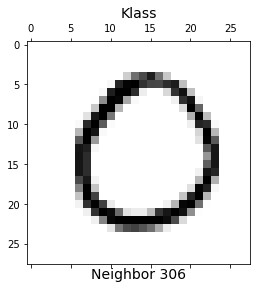

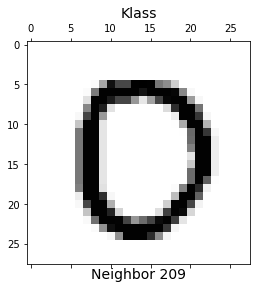

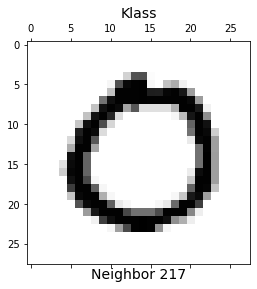

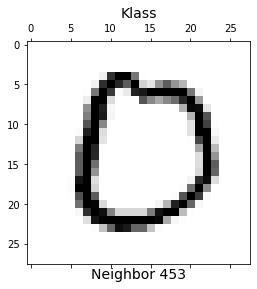

In [39]:
def k_closest_neighbors(data):
    neighbors = knn.kneighbors(data, return_distance=False)

    for siffra in neighbors[6]:
        bild = x_train.iloc[siffra]
        visaBilden = bild.values.reshape(1,28,28)
        plt.matshow(visaBilden[0], cmap=plt.cm.Greys)
        plt.title("Klass", fontsize= 14)
        plt.xlabel(f'Neighbor {siffra}', fontsize= 14)

k_closest_neighbors(x_train)

## VG
### Gör en egen k nearest neighbor (knn)

In [69]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
#class KNN
class KNN:
    def __init__(self,k=3):
        self.k=k

    def train(self,x,y):
        self.X_train= x.values
        self.y_train= y.values

    def predict(self,X):
        y_prediksi = [self.prediksi(x) for x in X.values]
        return np.array(y_prediksi)

    def prediksi(self,x):
        #1.Hitung jarak kesemua data training
        jarak_titik = [self.jarak(x,x_train) for x_train in self.X_train]
        #2.urutkan berdasarkan jarak terdekat,ambil sejumlahK
        k_terbaik=np.argsort(jarak_titik)[:self.k]
        #3.ambil Labelkterbaik
        label_k_terbaik=[self.y_train[i] for i in k_terbaik]
        #4.voting yang paling banyak
        hasil_voting=Counter(label_k_terbaik).most_common(1)
        return hasil_voting[0][0]

    def jarak(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))

In [72]:
model = KNN(k = 10)
model.train(x_train, y_train)
hasil = model.predict(x_test)

akurasi=np.sum(hasil == y_test)/len(x_test)
print("akurasi: ", akurasi)

akurasi:  0.928


In [40]:
class BruteForceKNN:
    """
    Methods:
    -------
    fit: Calculate distances and ranks based on given data
    predict: Predict the K nearest self.neighbors based on problem type
    """ 
    def __init__(self, k, problem: int=0, metric: int=0):
        """
            Parameters
            ----------
            k: Number of nearest self.neighbors
            problem: Type of learning
            0 = Regression, 1 = Classification
            metric: Distance metric to be used. 
            0 = Euclidean, 1 = Manhattan
        """
        self.k = k
        self.problem = problem
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        import numpy as np
        from scipy import stats

        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []

        # Calculating distances  
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                if self.metric == 0:
                    d = (np.sqrt(np.sum(np.square(X_test.iloc[i,:] - self.X_train.iloc[j,:]))))  # Euclidean distance
                else:
                    d = (np.absolute(X_test.iloc[i, :] - self.X_train.iloc[j,:]))  # Manhattan distance
                distance.append((d, y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order

            # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            if self.problem == 0:
                y_pred.append(np.mean(neighbors))  # For Regression
            else:
                y_pred.append(stats.mode(neighbors)[0][0])  # For Classification
        return y_pred

In [54]:
egenKNN = BruteForceKNN(k = 1, problem = 1, metric= 0)
egenKNN.fit(x_train, y_train)
y_predict= egenKNN.predict(x_test)
test_sc = accuracy_score(y_test, y_predict)

In [55]:
print(f"Test score är: {test_sc}")

Test score är: 0.934


### Får du samma resultat som i godkänt? Eller skiljer det sig på något vis? I så fall, hur?

I godkänt delen där k var lika med 1 var resultatet 0.934 <br>
Och i min egen knn så är resultatet 0.934 med k = 1. <br>
Så, jag får samma resultat som i godkänt delen.